## cifar10 이미지분류모델

In [1]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split#klearn 라이브러리의 train_test_split 함수를 활용하여 데이터 분리

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# cifar10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

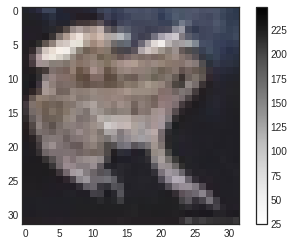

In [4]:
#데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해보기
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
#데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해주기
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1,3072)#cnn합성곱 신경망이아닌,dense레이어를 통해 모델을 학습할거기때문에 flatten레이어가 없어 직접1차원배열형태로 만들어줌
x_val = x_val.reshape(-1,3072)
x_test = x_test.reshape(-1,3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.(1차원배열에서 이미지데이터는 숫자로 이루어져잇기때문에 정규화시킴)
#정규화를 하는이유
#수치 안정성: 신경망은 작은 가중치 초기값을 가지며, 이러한 작은 숫자들과 큰 입력값(예: 픽셀값 255)이 곱해지면 수치 안정성 문제가 발생할 수 있습니다. 이는 학습 과정에서 비효율적인 학습이나 심지어는 학습이 제대로 이루어지지 않는 결과를 초래할 수 있습니다. 정규화를 통해 이 문제를 방지할 수 있습니다.
#학습 속도 향상: 정규화 된 데이터는 최적의 솔루션에 더 빨리 수렴하는 경향이 있습니다. 이는 경사 하강법 같은 최적화 알고리즘이 더 효율적으로 작동하게 하므로 학습 속도를 향상시킵니다.
#방어 매커니즘: 정규화는 또한 이상치에 대한 일종의 방어 매커니즘 역할을 합니다. 이상치는 평균이나 분산을 크게 변경할 수 있지만, 정규화를 통해 이러한 영향을 최소화할 수 있습니다.
#따라서, 이 코드에서는 이미지 데이터를 0과 1 사이의 값으로 정규화하여 이러한 이점을 활용하고 있습니다.

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [8]:
#모델구성및 컴파일
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu',kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu',kernel_initializer='he_normal',kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#앞서 categorical_crossentropy와 다르게 sparse_categorical_crossentropy을 쓴 이유
#이미지데이터는 원핫인코딩형태가 아니기때문에 0,1만 값으로 가지지않는다. 정규화를 시켰더라도 0~1사이에 값으로 각각 값을 가지기때문에sparse_categorical_crossentropy를써서 직접 처리할수 있게한다.
#sparse_categorical_crossentropy 손실 함수는 모델의 예측값 (각 클래스에 대한 확률 분포, 예: [0.1, 0.7, 0.2])과 이 실제 레이블 사이의 손실을 계산합니다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0

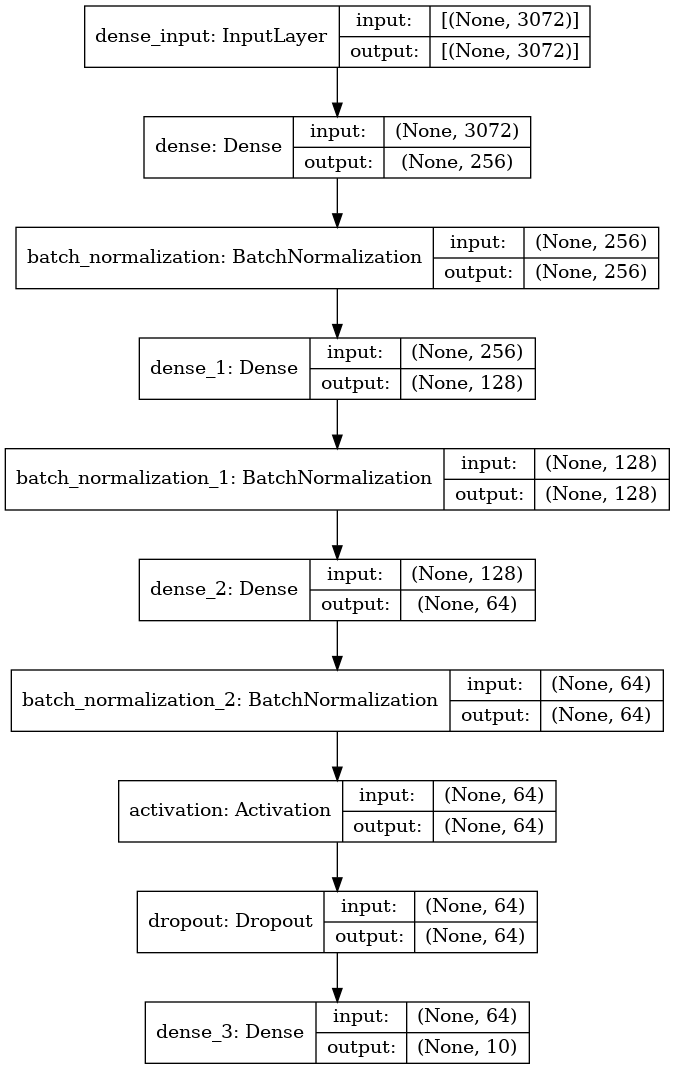

In [10]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

In [16]:
#모델학습및 컴파일(ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.)
from tensorflow.keras import callbacks
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/15
1250/1250 [==============================] - 6s 4ms/step - loss: 3.1707 - accuracy: 0.2901 - val_loss: 2.0493 - val_accuracy: 0.3476
Epoch 2/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9375 - accuracy: 0.3540 - val_loss: 2.4824 - val_accuracy: 0.2364
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8392 - accuracy: 0.3740 - val_loss: 1.8181 - val_accuracy: 0.3794
Epoch 4/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7892 - accuracy: 0.3927 - val_loss: 1.7127 - val_accuracy: 0.4141
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7545 - accuracy: 0.4056 - val_loss: 1.9009 - val_accuracy: 0.3662
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7298 - accuracy: 0.4145 - val_loss: 1.7414 - val_accuracy: 0.4090
Epoch 7/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7174 - accuracy: 0.4227 - val_loss: 1.6830 - val_accuracy:

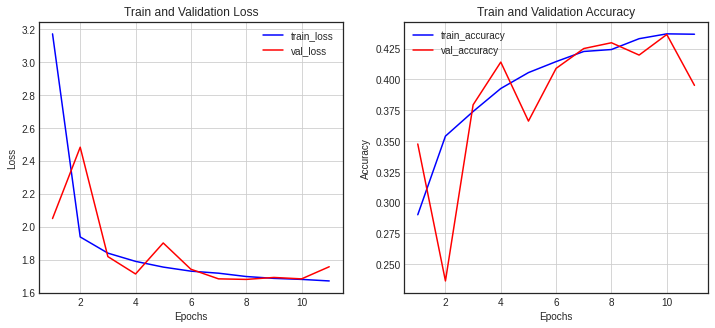

In [17]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [18]:
#모델평가및 예측
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6731 - accuracy: 0.4403


[1.6730929613113403, 0.44029998779296875]